In [ ]:
!pip install d2l

In [ ]:
# Table of Contents

## binary cross-entropy loss

The term "binary cross-entropy" refers to a specific loss function commonly used in binary classification tasks, especially in the context of machine learning and neural networks.

Here's a breakdown of the technical terms:

- Binary: In this context, "binary" refers to a classification problem with two possible outcomes or classes.

- Cross-Entropy: Cross-entropy is a measure of the difference between two probability distributions. In the context of binary classification, it quantifies the difference between the predicted probability distribution and the actual distribution of the target class.

The binary cross-entropy loss function is particularly well-suited for binary classification tasks, where the goal is to minimize the difference between the predicted probabilities and the actual binary outcomes. It is widely used in training neural networks for tasks such as image classification, sentiment analysis, and medical diagnosis.

In [3]:
import torch
import torch.nn as nn

# Define true labels and predicted probabilities
y_true = torch.tensor([1., 0., 1.])
y_pred = torch.tensor([0.9, 0.2, 0.8])

# Create a BCELoss loss object
bce_loss = nn.BCELoss()

# Calculate the loss
loss = bce_loss(y_pred, y_true)
print(f"Binary Cross-Entropy Loss (PyTorch): {loss.item()}")

Binary Cross-Entropy Loss (PyTorch): 0.18388254940509796


## Nonparametric Attention Pooling

refers to a model in machine learning that does not rely on fixed parameters and involves aggregating information with consideration and emphasis on certain elements without predefined structure or constraints. In the context of the provided text, this term is used in the domain of machine learning and neural networks to describe a method where attention weights are assigned to different data points based on how relevant they are to a given query, allowing for flexible and dynamic allocation of focus during the aggregation process.

In [1]:
import torch
from d2l import torch as d2l

def show_heatmaps(matrices, xlabel, ylabel, titles=None, figsize=(2.5, 2.5),
                  cmap='Reds'):
    """显示矩阵热图"""
    d2l.use_svg_display()
    num_rows, num_cols = matrices.shape[0], matrices.shape[1]
    fig, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize,
                                 sharex=True, sharey=True, squeeze=False)
    for i, (row_axes, row_matrices) in enumerate(zip(axes, matrices)):
        for j, (ax, matrix) in enumerate(zip(row_axes, row_matrices)):
            pcm = ax.imshow(matrix.detach().numpy(), cmap=cmap)
            if i == num_rows - 1:
                ax.set_xlabel(xlabel)
            if j == 0:
                ax.set_ylabel(ylabel)
            if titles:
                ax.set_title(titles[j])
    fig.colorbar(pcm, ax=axes, shrink=0.6);

/home/ubuntu/anaconda3/envs/py310/lib/python3.10/site-packages/torch/cuda/__init__.py:628: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


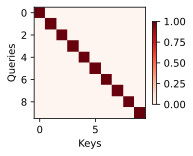

In [8]:
attention_weights = torch.eye(10).reshape((1, 1, 10, 10))
show_heatmaps(attention_weights, xlabel='Keys', ylabel='Queries')

In [13]:
## Nadaraya-Watson Kernel Regression
import torch
from torch import nn
from d2l import torch as d2l

n_train = 50  # 训练样本数
x_train, _ = torch.sort(torch.rand(n_train) * 5)   # 排序后的训练样本

def f(x):
    return 2 * torch.sin(x) + x**0.8

y_train = f(x_train) + torch.normal(0.0, 0.5, (n_train,))  # 训练样本的输出
x_test = torch.arange(0, 5, 0.1)  # 测试样本
y_truth = f(x_test)  # 测试样本的真实输出
n_test = len(x_test)  # 测试样本数
n_test

50

In [14]:
# 下面的函数将绘制所有的训练样本（样本由圆圈表示）， 不带噪声项的真实数据生成函数（标记为“Truth”）， 以及学习得到的预测函数（标记为“Pred”）。
def plot_kernel_reg(y_hat):
    d2l.plot(x_test, [y_truth, y_hat], 'x', 'y', legend=['Truth', 'Pred'],
             xlim=[0, 5], ylim=[-1, 5])
    d2l.plt.plot(x_train, y_train, 'o', alpha=0.5);

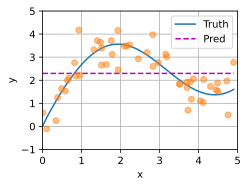

In [15]:
y_hat = torch.repeat_interleave(y_train.mean(), n_test)
plot_kernel_reg(y_hat)

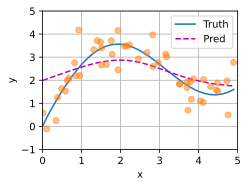

In [16]:
# X_repeat的形状:(n_test,n_train),
# 每一行都包含着相同的测试输入（例如：同样的查询）
X_repeat = x_test.repeat_interleave(n_train).reshape((-1, n_train))
# x_train包含着键。attention_weights的形状：(n_test,n_train),
# 每一行都包含着要在给定的每个查询的值（y_train）之间分配的注意力权重
attention_weights = nn.functional.softmax(-(X_repeat - x_train)**2 / 2, dim=1)
# y_hat的每个元素都是值的加权平均值，其中的权重是注意力权重
y_hat = torch.matmul(attention_weights, y_train)
plot_kernel_reg(y_hat)

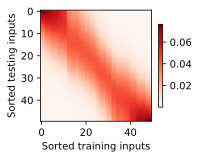

In [17]:
d2l.show_heatmaps(attention_weights.unsqueeze(0).unsqueeze(0),
                  xlabel='Sorted training inputs',
                  ylabel='Sorted testing inputs')

## Attention mechanism with parameters

refers to a specific type of attention mechanism that incorporates learnable parameters. Unlike non-parametric attention mechanisms, which rely solely on the data for inference, attention mechanisms with parameters introduce model parameters that are optimized during the learning process. This enables the model to dynamically adjust and learn the importance or relevance of different elements in the input sequence or data. The incorporation of parameters in attention mechanisms enhances the model's ability to capture complex patterns and relationships, improving its performance in tasks such as sequence modeling, machine translation, and image captioning.